# House Prices Regression

## Import Library

In [193]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math

## Data Collection and Pre-processing

In [194]:
TRAIN_DATA_PATH = './house-prices-advanced-regression-techniques/train.csv'

house_prices_data = pd.read_csv(TRAIN_DATA_PATH)

In [195]:
house_prices_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [196]:
house_prices_data.shape

(1460, 81)

In [197]:
for column in house_prices_data.columns:
    missing_data = house_prices_data[column].isnull().sum()
    if not missing_data == 0:
        print(f'{column}: {missing_data}')

LotFrontage: 259
Alley: 1369
MasVnrType: 8
MasVnrArea: 8
BsmtQual: 37
BsmtCond: 37
BsmtExposure: 38
BsmtFinType1: 37
BsmtFinType2: 38
Electrical: 1
FireplaceQu: 690
GarageType: 81
GarageYrBlt: 81
GarageFinish: 81
GarageQual: 81
GarageCond: 81
PoolQC: 1453
Fence: 1179
MiscFeature: 1406


Finding the record where there is no maosonry veneer

In [198]:
house_prices_data[house_prices_data['MasVnrType'].isnull()][['MasVnrType', 'MasVnrArea']]

,MasVnrType,MasVnrArea
234,NaN,NaN
529,NaN,NaN
650,NaN,NaN
936,NaN,NaN
973,NaN,NaN
977,NaN,NaN
1243,NaN,NaN
1278,NaN,NaN


Finding the record where there is a basement but is missing some info

In [199]:
have_bsmt = ~house_prices_data['BsmtQual'].isnull()
missing_bsmt_data = house_prices_data[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']].isnull().any(axis=1)

house_prices_data[have_bsmt & missing_bsmt_data].loc[:, ['Id', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF']]

,Id,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF
332,333,Gd,TA,No,GLQ,NaN,1124,479,3206
948,949,Gd,TA,NaN,Unf,Unf,0,0,936


Finding the record where there is fireplace but no info on quality

In [200]:
have_fireplace = house_prices_data['Fireplaces'] != 0
missing_fireplace_qual = house_prices_data['FireplaceQu'].isnull()

house_prices_data[have_fireplace & missing_fireplace_qual]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


Finding the record where there is no garage

In [201]:
house_prices_data[['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']].isnull().any(axis=1).sum()

81

Finding the record where there is a pool but no info on quality

In [202]:
have_pool = house_prices_data['PoolArea'] != 0
missing_pool_data = house_prices_data['PoolQC'].isnull()

house_prices_data[have_pool & missing_pool_data]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


## Data Visualization

Text(0, 0.5, 'Counts')

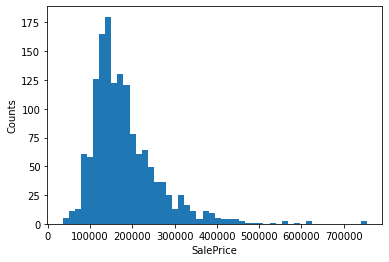

In [203]:
ax = plt.hist(house_prices_data['SalePrice'], 50)
plt.xlabel('SalePrice')
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

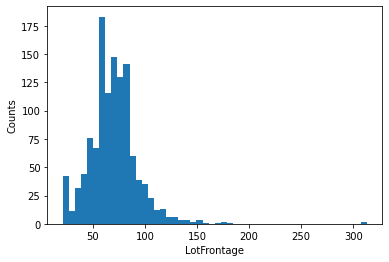

In [204]:
ax = plt.hist(house_prices_data['LotFrontage'], 50)
plt.xlabel('LotFrontage')
plt.ylabel('Counts')

(-1000.0, 500000.0)

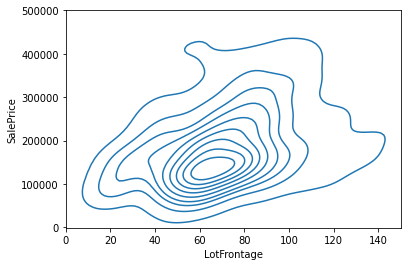

In [205]:
ax = sns.kdeplot(x=house_prices_data['LotFrontage'], y=house_prices_data['SalePrice'])
ax.set_xlim(0, 150)
ax.set_ylim(-1000, 500000)

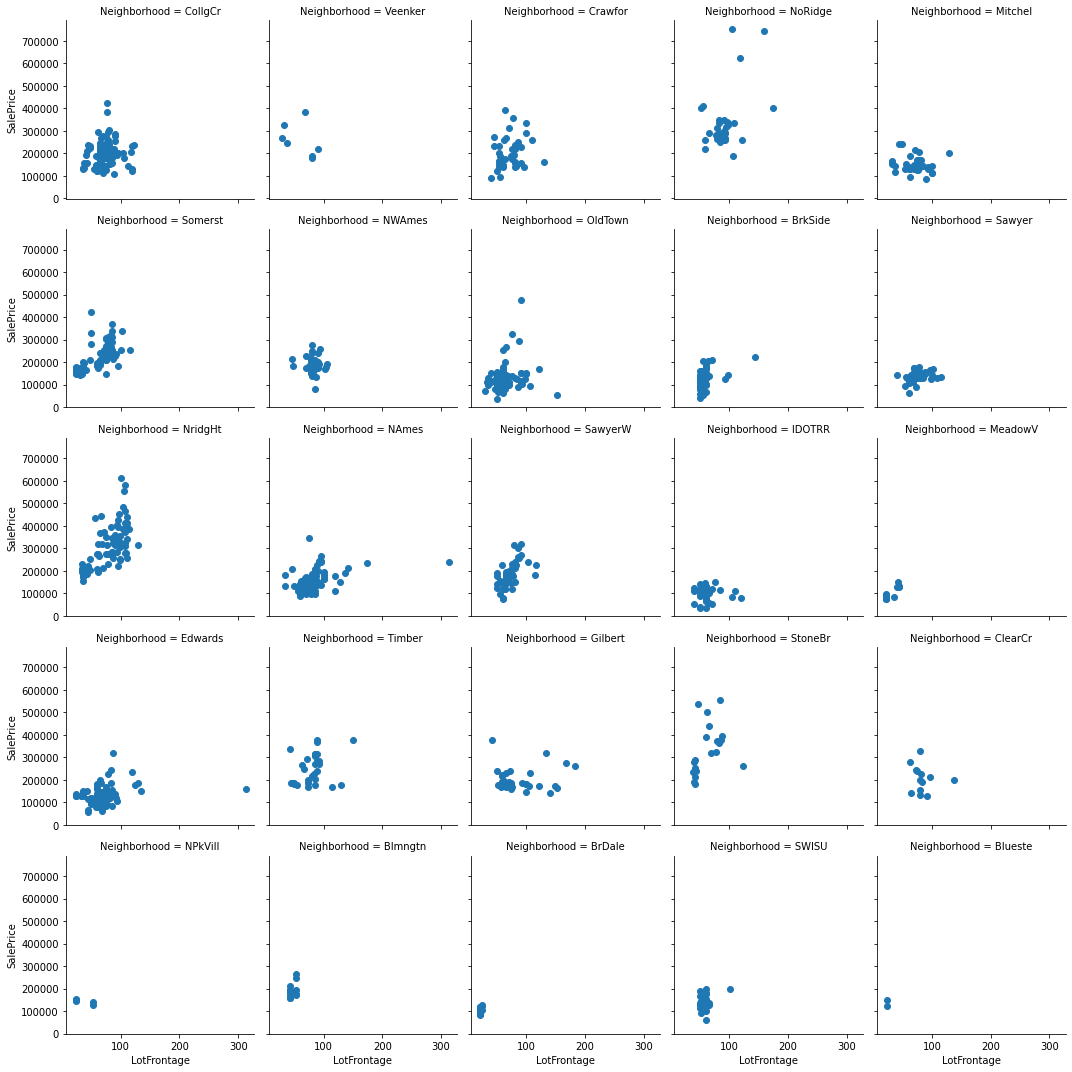

In [206]:
def scatter(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.scatter(x,y, cmap=cmap, **kwargs)

g = sns.FacetGrid(house_prices_data, col='Neighborhood', col_wrap=5)
g.map(scatter, 'LotFrontage', 'SalePrice')

## Missing Data Handling:

    LotFrontage - replace with mean of its respective neighbor

    Electrical - replace with mode

    BsmtExposure - replace with mode

    BsmtFinType2 - replace with mode (excluded Unf)

    MasVnrType - replace with mode

    MasVnrArea - replace with mean

In [207]:
for value in house_prices_data['Neighborhood'].unique():
    avg_lotfrontage = round(house_prices_data[house_prices_data['Neighborhood'] == value]['LotFrontage'].mean(), 2)

    house_prices_data.loc[(house_prices_data['Neighborhood'] == value) & house_prices_data['LotFrontage'].isnull(), 'LotFrontage'] = avg_lotfrontage

In [208]:
house_prices_data['Electrical'].fillna(house_prices_data['Electrical'].mode()[0], inplace=True)

In [209]:
house_prices_data.loc[~house_prices_data['BsmtQual'].isnull() & house_prices_data['BsmtExposure'].isnull(), 'BsmtExposure'] = house_prices_data['BsmtExposure'].mode()[0]

In [210]:
house_prices_data.loc[~house_prices_data['BsmtQual'].isnull() & house_prices_data['BsmtFinType2'].isnull(), 'BsmtFinType2'] = house_prices_data[house_prices_data['BsmtFinType2'] != 'Unf']['BsmtFinType2'].mode()[0]

In [211]:
for column in house_prices_data.columns:
    missing_data = house_prices_data[column].isnull().sum()
    if not missing_data == 0:
        print(f'{column}: {missing_data}')

Alley: 1369
MasVnrType: 8
MasVnrArea: 8
BsmtQual: 37
BsmtCond: 37
BsmtExposure: 37
BsmtFinType1: 37
BsmtFinType2: 37
FireplaceQu: 690
GarageType: 81
GarageYrBlt: 81
GarageFinish: 81
GarageQual: 81
GarageCond: 81
PoolQC: 1453
Fence: 1179
MiscFeature: 1406


Filling NA

In [212]:
house_prices_data['Alley'].fillna('NA', inplace=True)
house_prices_data['FireplaceQu'].fillna('NA', inplace=True)
house_prices_data['PoolQC'].fillna('NA', inplace=True)
house_prices_data['Fence'].fillna('NA', inplace=True)
house_prices_data['MiscFeature'].fillna('NA', inplace=True)

In [213]:
house_prices_data['MasVnrType'].fillna(house_prices_data['MasVnrType'].mode()[0], inplace=True)

In [214]:
house_prices_data['MasVnrArea'].fillna(house_prices_data['MasVnrArea'].mean(), inplace=True)

In [215]:
house_prices_data.loc[house_prices_data['BsmtQual'].isnull(), ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']] = 'NA'
house_prices_data.loc[house_prices_data['GarageType'].isnull(), ['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']] = 'NA'

In [216]:
min = 3000
max = -1

for row in house_prices_data.index:
    if house_prices_data['GarageYrBlt'][row] != 'NA':
        if int(house_prices_data['GarageYrBlt'][row]) < min:
            min = int(house_prices_data['GarageYrBlt'][row])
        if int(house_prices_data['GarageYrBlt'][row]) > max:
            max = int(house_prices_data['GarageYrBlt'][row])

year_list = []
year_step = 10

while min <= max + year_step:
    year_list.append(min)
    min += year_step

year_list

[1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]

In [217]:
for row in house_prices_data.index:
    for i in range(len(year_list) - 1):
        found = False
        if house_prices_data['GarageYrBlt'][row] != 'NA':
            if int(house_prices_data['GarageYrBlt'][row]) < year_list[i+1]:
                house_prices_data.loc[row, 'GarageYrBlt'] = f'{year_list[i]}-{year_list[i+1]}'
                found = True
        if found:
            break

In [218]:
cleaned = True

for column in house_prices_data.columns:
    missing_data = house_prices_data[column].isnull().sum()
    if not missing_data == 0:
        cleaned = False
        print(f'{column}: {missing_data}')

if cleaned:
    print('No missing data...')

No missing data...


## Feature Encoding

In [219]:
dummies_col = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
                'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 
                'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
                'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 
                'SaleType', 'SaleCondition']

for column in dummies_col:
    house_prices_data[column] = house_prices_data[column].astype('category')

In [220]:
house_prices_data_dummies = pd.get_dummies(house_prices_data, drop_first=True, columns=dummies_col)

## Modeling (RandomForest)

In [221]:
X = house_prices_data_dummies.drop(columns='SalePrice', axis=1)
Y = house_prices_data_dummies['SalePrice']

In [222]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [223]:
regr = RandomForestRegressor(n_estimators=500, random_state=1)
regr.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=500, random_state=1)

In [224]:
Y_predict = regr.predict(X_train)

In [225]:
mse = mean_squared_error(Y_train, Y_predict)
print(f'RMSE: {math.sqrt(mse)}')

mae = mean_absolute_error(Y_train, Y_predict)
print(f'MAE: {mae}')

r2 = r2_score(Y_train, Y_predict)
print(f'R2: {r2}')

RMSE: 11521.198526460073
MAE: 6705.09334931507
R2: 0.9782118671027846


In [226]:
Y_test_predict = regr.predict(X_test)

In [227]:
mse = mean_squared_error(Y_test, Y_test_predict)
print(f'RMSE: {math.sqrt(mse)}')

mae = mean_absolute_error(Y_test, Y_test_predict)
print(f'MAE: {mae}')

r2 = r2_score(Y_test, Y_test_predict)
print(f'R2: {r2}')

RMSE: 29861.106792945826
MAE: 17971.7922260274
R2: 0.8749729699432643


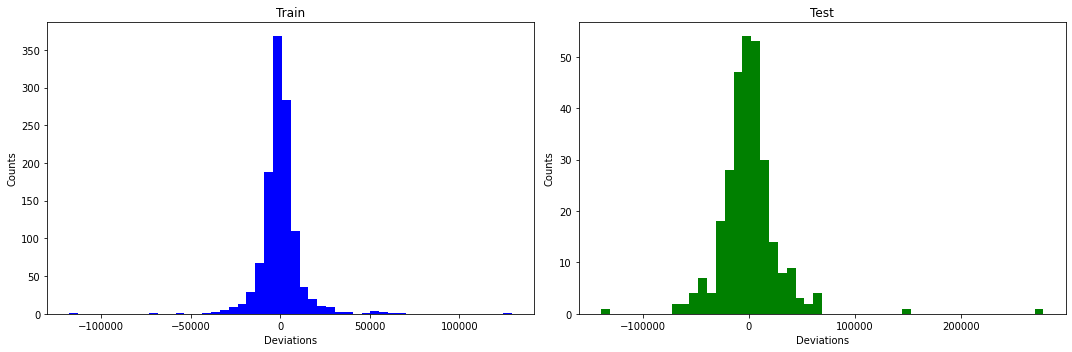

In [228]:
plt_data = [(Y_train - Y_predict), (Y_test - Y_test_predict)]
plt_title = ['Train', 'Test']
plt_color = ['b', 'g']

fig, axes = plt.subplots(1, 2, figsize=(15,5))
axes = axes.ravel()

for idx,ax in enumerate(axes):
    ax.hist(plt_data[idx], 50, facecolor=plt_color[idx])
    ax.set_xlabel('Deviations')
    ax.set_ylabel('Counts')
    ax.set_title(plt_title[idx])

plt.tight_layout()

## Explore Feature Importances and Retraininig Model

In [229]:
regr.feature_importances_.shape

(299,)

In [230]:
features = X.columns[0:len(X)]
indices = np.argsort(regr.feature_importances_)[0:20]

<BarContainer object of 20 artists>

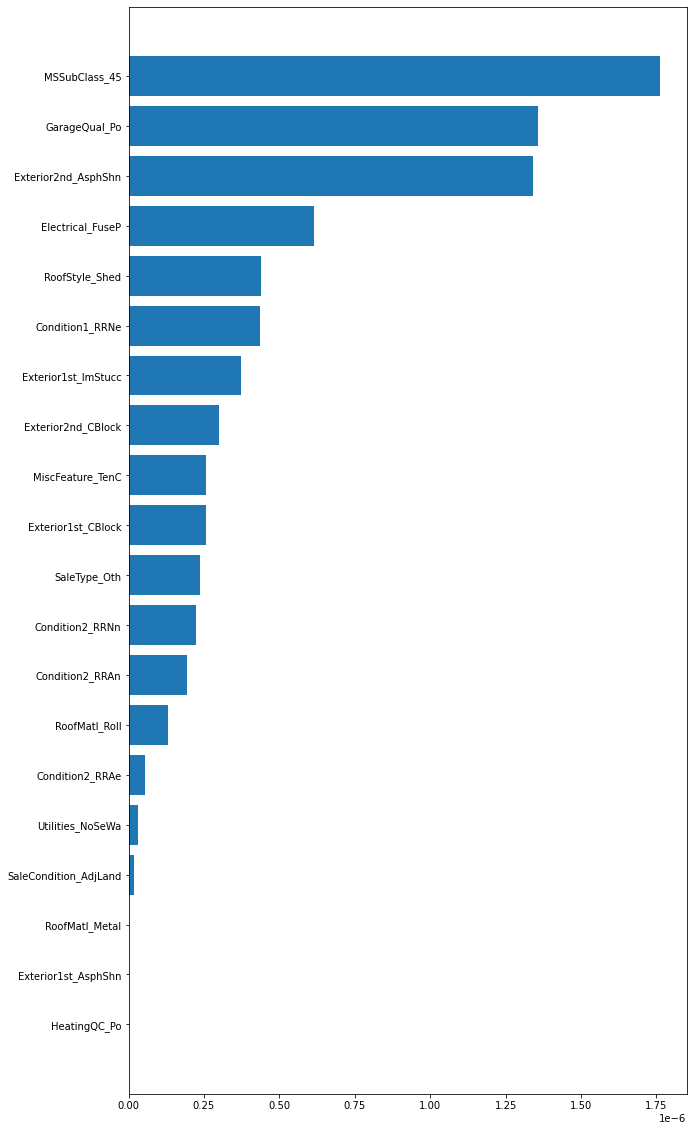

In [231]:
plt.figure(figsize=(10,20))
plt.barh(features[indices], regr.feature_importances_[indices])


Important Features:
- MSSubClass

- GarageQual

- Exterior2nd

- Electrical

- RoofStyle

- Condition1

- Exterior1st

- MiscFeature

- SaleType

- Condition2

- RoofMatl

- Utilities

- SaleCondition


## Reading Test Data for Submission

In [233]:
TEST_DATA_PATH = './house-prices-advanced-regression-techniques/test.csv'

test_data = pd.read_csv(TEST_DATA_PATH)

In [234]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [235]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [236]:
cleaned = True

for column in test_data.columns:
    missing_data = test_data[column].isnull().sum()
    if not missing_data == 0:
        cleaned = False
        print(f'{column}: {missing_data}')

if cleaned:
    print('No missing data...')

MSZoning: 4
LotFrontage: 227
Alley: 1352
Utilities: 2
Exterior1st: 1
Exterior2nd: 1
MasVnrType: 16
MasVnrArea: 15
BsmtQual: 44
BsmtCond: 45
BsmtExposure: 44
BsmtFinType1: 42
BsmtFinSF1: 1
BsmtFinType2: 42
BsmtFinSF2: 1
BsmtUnfSF: 1
TotalBsmtSF: 1
BsmtFullBath: 2
BsmtHalfBath: 2
KitchenQual: 1
Functional: 2
FireplaceQu: 730
GarageType: 76
GarageYrBlt: 78
GarageFinish: 78
GarageCars: 1
GarageArea: 1
GarageQual: 78
GarageCond: 78
PoolQC: 1456
Fence: 1169
MiscFeature: 1408
SaleType: 1


## Cleaning Test Data
- Use data from the training set

In [237]:
test_data['MSZoning'].fillna(house_prices_data['MSZoning'].mode()[0], inplace=True)
test_data['Utilities'].fillna(house_prices_data['Utilities'].mode()[0], inplace=True)
test_data['Exterior1st'].fillna(house_prices_data['Exterior1st'].mode()[0], inplace=True)
test_data['Exterior2nd'].fillna(house_prices_data['Exterior2nd'].mode()[0], inplace=True)
test_data['KitchenQual'].fillna(house_prices_data['KitchenQual'].mode()[0], inplace=True)
test_data['Functional'].fillna(house_prices_data['Functional'].mode()[0], inplace=True)
test_data['SaleType'].fillna(house_prices_data['SaleType'].mode()[0], inplace=True)
test_data['Alley'].fillna('NA', inplace=True)

In [238]:
test_data['MasVnrType'].fillna(house_prices_data['MasVnrType'].mode()[0], inplace=True)
test_data['MasVnrArea'].fillna(house_prices_data['MasVnrArea'].mean(), inplace=True)

In [239]:
for value in test_data['Neighborhood'].unique():
    avg_lotfrontage = round(house_prices_data[house_prices_data['Neighborhood'] == value]['LotFrontage'].mean(), 2)

    test_data.loc[(test_data['Neighborhood'] == value) & test_data['LotFrontage'].isnull(), 'LotFrontage'] = avg_lotfrontage

In [240]:
query_columns = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']

query = test_data['BsmtQual'].isnull() & test_data['BsmtCond'].isnull()

for row in test_data.index:
    if query[row]:
        test_data.loc[row, ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']] = 'NA'
        test_data.loc[row, ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']] = 0

query = test_data[query_columns].isnull().any(axis=1)

for column in query_columns:
    if test_data[column].dtype == 'object':
        test_data[column].fillna(house_prices_data[house_prices_data['BsmtQual'] != 'NA'][column].mode()[0], inplace=True)
    else:
        test_data[column].fillna(house_prices_data[house_prices_data['BsmtQual'] != 'NA'][column].mean(), inplace=True)
    

In [241]:
# checking garage
query_columns = ['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond']

# no garage
query = test_data['GarageType'].isnull() 

for row in test_data.index:
    if query[row]:
        test_data.loc[row, ['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']] = 'NA'
        test_data.loc[row, ['GarageCars', 'GarageArea']] = 0

# have garage but missing some info
query = test_data[query_columns].isnull().any(axis=1)
have_garage = house_prices_data['GarageType'] != 'NA'

for row in test_data[query].index:
    if pd.isnull(test_data.loc[row, query_columns[1]]):
        test_data.loc[row, query_columns[1]] = test_data['YearRemodAdd'][row]

test_data['GarageType'].fillna(house_prices_data[have_garage]['GarageType'].mode()[0], inplace=True)
test_data['GarageFinish'].fillna(house_prices_data[have_garage]['GarageFinish'].mode()[0], inplace=True)
test_data['GarageCars'].fillna(house_prices_data[have_garage]['GarageCars'].mode()[0], inplace=True)
test_data['GarageArea'].fillna(house_prices_data[have_garage]['GarageArea'].mean(), inplace=True)
test_data['GarageQual'].fillna(house_prices_data[have_garage]['GarageQual'].mode()[0], inplace=True)
test_data['GarageCond'].fillna(house_prices_data[have_garage]['GarageCond'].mode()[0], inplace=True)

In [242]:
for row in test_data.index:
    for i in range(len(year_list) - 1):
        found = False
        if test_data['GarageYrBlt'][row] != 'NA':
            if int(test_data['GarageYrBlt'][row]) < year_list[i+1]:
                test_data.loc[row, 'GarageYrBlt'] = f'{year_list[i]}-{year_list[i+1]}'
                found = True
        if found:
            break

In [243]:
# all missing FireplaceQu are due to the house not having one
test_data[(test_data['Fireplaces'] != 0) & test_data['FireplaceQu'].isnull()]

test_data['FireplaceQu'].fillna('NA', inplace=True)

In [244]:
# have pool but quality missing
query = (test_data['PoolArea'] > 0) & test_data['PoolQC'].isnull()

for row in test_data[query].index:
    test_data.loc[row, 'PoolQC'] = house_prices_data[house_prices_data['PoolQC'] != 'NA']['PoolQC'].mode()[0]

test_data['PoolQC'].fillna('NA', inplace=True)


In [245]:
test_data['Fence'].fillna('NA', inplace=True)

In [246]:
# have value but missing feature
query = (test_data['MiscVal'] > 0) & (test_data['MiscFeature'].isnull())

for row in test_data[query].index:
    test_data.loc[row, 'MiscFeature'] = house_prices_data['MiscFeature'].mode()[0]

test_data['MiscFeature'].fillna('NA', inplace=True)

In [247]:
cleaned = True

for column in test_data.columns:
    missing_data = test_data[column].isnull().sum()
    if not missing_data == 0:
        cleaned = False
        print(f'{column}: {missing_data}')

if cleaned:
    print('No missing data...')

No missing data...


## Feature Encoding

In [248]:
# set dtype as categiry with same category as in training set
for column in dummies_col:
    test_data[column] = pd.Categorical(test_data[column], categories=house_prices_data[column].cat.categories)

In [249]:
test_data_dummies = pd.get_dummies(test_data, drop_first=True, columns=dummies_col)

## Predict and Generate Submission

In [250]:
submission_predict = regr.predict(test_data_dummies)
submission_predict

array([127657.854, 153550.5  , 186301.284, ..., 152169.788, 119602.34 ,
       223533.784])

In [251]:
submission_df = pd.DataFrame({'Id':test_data_dummies['Id'],'SalePrice':submission_predict})
submission_df.head()

,Id,SalePrice
0,1461,127657.854
1,1462,153550.500
2,1463,186301.284
3,1464,186036.128
4,1465,191691.452


In [252]:
filename = 'house_prices_submission.csv'

submission_df.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: house_prices_submission.csv
